# El Problema
Se desea construir un modelo predictivo que dados ciertos datos de un estudiante, como el tipo de red que tiene,el dispositivo usa para tomar la clase o su situacion financiera, pueda predecir el nivel de adaptabilidad de dicho estudiante a sus clases online.

Como se puede ver este es un problema de clasificacion, para clasificar si el estudiante tiene un nivel de adaptabilidad de Bajo, Moderado o Alto

# Preparamos los datos

Se preparara el dataset para que la red neuronal pueda ser entrenada mediante limpieza de datos y hot encoding, en este caso no se encontraron valores nulos por lo que solo seria nesesario hacer el hot encoding

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

from pickle import load
import keras
from keras.utils.vis_utils import plot_model
from keras.models import *
from keras.layers import *
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
datasetDirecction = "./training-ds.csv"
data_students = pd.read_csv(datasetDirecction)
data_students

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
959,3G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
960,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
961,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0,Bajo
962,3G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado


In [3]:
labels_map = {
    0: "Alto",
    1: "Bajo",
    2: "Moderado"
}
data_students_training = pd.get_dummies(data_students, columns=["Tipo de Red", "Estudiante de Tecnología", "Nivel de Educación", "Vive en Ciudad", "Tipo de Instituto", "Edad", "Dispositivo", "Tipo de Internet", "Situación Financiera", "Género", "Duración de la Clase"])
data_students_training["Nivel de Adaptación"] = data_students_training["Nivel de Adaptación"].astype('category').cat.codes
data_students_training

,Nivel de Adaptación,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,2,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,2,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,0,0,0,1,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
960,2,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
961,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
962,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


In [4]:
print(type(data_students_training))
data_students_training.dtypes

<class 'pandas.core.frame.DataFrame'>


Nivel de Adaptación                int8
Tipo de Red_2G                    uint8
Tipo de Red_3G                    uint8
Tipo de Red_4G                    uint8
Estudiante de Tecnología_No       uint8
Estudiante de Tecnología_Si       uint8
Nivel de Educación_Colegio        uint8
Nivel de Educación_Escuela        uint8
Nivel de Educación_Universidad    uint8
Vive en Ciudad_No                 uint8
Vive en Ciudad_Si                 uint8
Tipo de Instituto_Privado         uint8
Tipo de Instituto_Público         uint8
Edad_01-May                       uint8
Edad_06-Oct                       uint8
Edad_16-20                        uint8
Edad_21-25                        uint8
Edad_26-30                        uint8
Edad_Nov-15                       uint8
Dispositivo_Computadora           uint8
Dispositivo_Smartphone            uint8
Dispositivo_Tableta               uint8
Tipo de Internet_Compra Megas     uint8
Tipo de Internet_Wifi             uint8
Situación Financiera_Buena        uint8


Ahora separamos los datos entre los datos de entrada(x) y el target(y) ademas de separarlos para el training y el test

In [5]:
dataset_x = data_students_training.iloc[0:,1:].to_numpy()
dataset_y = data_students_training.iloc[0:,0].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, train_size=0.8)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [6]:
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (771, 31)
y_train.shape: (771,)
x_test.shape: (193, 31)
y_test.shape: (193,)


# Armamos la arquitectura de la red neuronal
Ahora construimos nuestra arquitectura de la red neuronal usando tensorflow, esta arquitectura deberia tener 31 entradas y 3 salidas, para esta prueba utlizaremos una capa oculta de 32 neuronas ( n_units)

In [7]:
class NeuralNetwork(tf.keras.Model):
    def __init__(self,units_hiddenLayer):
        super(NeuralNetwork, self).__init__()
        self.sequence = tf.keras.Sequential([
          tf.keras.layers.Dense(units_hiddenLayer, activation='relu'),
          tf.keras.layers.Dense(3) # capa de salida
        ])
    
    def call(self, x: tf.Tensor) -> tf.Tensor:
        y_prime = self.sequence(x)
        return y_prime


model = NeuralNetwork(32)
model.build((1,31))
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (1, 3)                    1123      
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


# Entrenamos y validamos la red neuronal
Con los datos supervisados de training entrenamos la red neuronal con los siguientes parametros
Además, aplicamos los test ¡¡¡ bla bla

In [8]:
learning_rate = 0.1
batch_size = 64
epochs = 20
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ["accuracy"]

train_dataset_batched = train_dataset.batch(batch_size).shuffle(500)
test_dataset_batched = test_dataset.batch(batch_size).shuffle(500)

model.compile(optimizer, loss_function, metrics)
print('\nFitting:')
model.fit(train_dataset_batched, epochs=epochs,validation_data=test_dataset_batched)
# model.fit(train_dataset_batched, validation_data = test_dataset_batched, epochs=epochs)



Fitting:
Epoch 1/20
13/13 [==============================] - 1s 13ms/step - loss: 0.9602 - accuracy: 0.5019 - val_loss: 0.8602 - val_accuracy: 0.6062
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.8185 - accuracy: 0.6407 - val_loss: 0.8978 - val_accuracy: 0.6269
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.6329 - val_loss: 0.8083 - val_accuracy: 0.6218
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.6420 - val_loss: 0.8045 - val_accuracy: 0.6218
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.7335 - accuracy: 0.6822 - val_loss: 0.8586 - val_accuracy: 0.6425
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.7456 - accuracy: 0.6693 - val_loss: 0.7760 - val_accuracy: 0.6425
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.7234 - accuracy: 0.6861 - val_loss: 0.7855 - val_accuracy: 0.6269
Epoch 8/2

Optimizamos las funciones para manejarlo en un mismo y tener difentes pruebas 

In [9]:
epochs = 100

In [20]:
df_results_model_1 = pd.DataFrame()
df_results_model_1['MAX Val Accuracy'] = None
df_results_model_1['Learning rate'] = None
df_results_model_1['Batch size'] = None
df_results_model_1['Units hiddenLayer'] = None
df_results_model_1['Nro epoch'] = None

In [21]:
def trainModel(learning_rate,batch_size,units_hiddenLayer):
    model = NeuralNetwork(units_hiddenLayer)
    model.build((1,31)) # number 31 for its quantity of columns
    
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    metrics = ["accuracy"]

    train_dataset_batched = train_dataset.batch(batch_size).shuffle(500)
    test_dataset_batched = test_dataset.batch(batch_size).shuffle(500)

    model.compile(optimizer, loss_function, metrics)
    print('\nFitting:')
    # model.fit(train_dataset_batched, epochs=epochs)
    model.fit(train_dataset_batched, epochs=epochs,validation_data=test_dataset_batched)
    
    print()
    history =list()
    history = model.history.history['val_accuracy']
    maxAcc = max(history)
    nro_epoch = history.index(maxAcc) + 1
    print( f"MAX Val Accuracy:  {maxAcc}" )
    print( f"Learning rate:  {learning_rate}" )
    print( f"Batch size:  {batch_size}" )
    print( f"Units hiddenLayer: {units_hiddenLayer}")
    print( f"Nro epoch: {nro_epoch}")
    
    global df_results_model_1
    new_row = {'MAX Val Accuracy': maxAcc ,'Learning rate':learning_rate, 'Batch size': batch_size,'Units hiddenLayer':units_hiddenLayer,'Nro epoch':nro_epoch}
    df_results_model_1 = df_results_model_1.append(new_row, ignore_index=True)

### Variation with learning rate
The range of values to consider for the learning rate is less than 1.0 and greater than 10^-6.

In [22]:
vector_learning_rate = [1,0.1,0.01,0.001,0.0001]

for learning_rate in vector_learning_rate:
    batch_size =  64
    units_hiddenLayer = 32
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
13/13 [==============================] - 0s 10ms/step - loss: 1.2270 - accuracy: 0.5227 - val_loss: 0.8240 - val_accuracy: 0.6477
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8285 - accuracy: 0.6304 - val_loss: 0.8105 - val_accuracy: 0.6580
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8452 - accuracy: 0.6498 - val_loss: 0.8056 - val_accuracy: 0.6632
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.6563 - val_loss: 0.7606 - val_accuracy: 0.6736
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7434 - accuracy: 0.6654 - val_loss: 0.8026 - val_accuracy: 0.6373
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.7030 - val_loss: 0.8284 - val_accuracy: 0.6528
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.7017 - val_loss: 0.8575 - val_accuracy: 0.6373
Ep

Epoch 59/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8132 - val_loss: 0.5414 - val_accuracy: 0.7876
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8093 - val_loss: 0.5820 - val_accuracy: 0.7358
Epoch 61/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8327 - val_loss: 0.5560 - val_accuracy: 0.8083
Epoch 62/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8314 - val_loss: 0.5423 - val_accuracy: 0.7824
Epoch 63/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8288 - val_loss: 0.5393 - val_accuracy: 0.7876
Epoch 64/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8275 - val_loss: 0.5824 - val_accuracy: 0.7979
Epoch 65/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8249 - val_loss: 0.5308 - val_accuracy: 0.8135
Epoch 

Epoch 16/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7147 - val_loss: 0.7818 - val_accuracy: 0.6684
Epoch 17/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.7017 - val_loss: 0.7428 - val_accuracy: 0.6528
Epoch 18/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7198 - val_loss: 0.7408 - val_accuracy: 0.6684
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.7237 - val_loss: 0.7398 - val_accuracy: 0.6736
Epoch 20/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.7263 - val_loss: 0.7314 - val_accuracy: 0.6477
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.7173 - val_loss: 0.7307 - val_accuracy: 0.6839
Epoch 22/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7276 - val_loss: 0.7277 - val_accuracy: 0.6632
Epoch 

Epoch 74/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7834 - val_loss: 0.6166 - val_accuracy: 0.7254
Epoch 75/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7769 - val_loss: 0.6195 - val_accuracy: 0.7150
Epoch 76/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7821 - val_loss: 0.6956 - val_accuracy: 0.6995
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7756 - val_loss: 0.6181 - val_accuracy: 0.7098
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7899 - val_loss: 0.6133 - val_accuracy: 0.7358
Epoch 79/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7925 - val_loss: 0.6553 - val_accuracy: 0.6995
Epoch 80/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7808 - val_loss: 0.6116 - val_accuracy: 0.7409
Epoch 

Epoch 31/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.6498 - val_loss: 0.8257 - val_accuracy: 0.6166
Epoch 32/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7886 - accuracy: 0.6563 - val_loss: 0.8238 - val_accuracy: 0.6321
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7870 - accuracy: 0.6576 - val_loss: 0.8221 - val_accuracy: 0.6321
Epoch 34/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7848 - accuracy: 0.6628 - val_loss: 0.8209 - val_accuracy: 0.6373
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.6602 - val_loss: 0.8190 - val_accuracy: 0.6373
Epoch 36/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7795 - accuracy: 0.6706 - val_loss: 0.8178 - val_accuracy: 0.6373
Epoch 37/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7789 - accuracy: 0.6667 - val_loss: 0.8169 - val_accuracy: 0.6373
Epoch 

Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.6991 - val_loss: 0.7729 - val_accuracy: 0.6477
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.7030 - val_loss: 0.7719 - val_accuracy: 0.6477
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.6965 - val_loss: 0.7715 - val_accuracy: 0.6477
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.6939 - val_loss: 0.7717 - val_accuracy: 0.6580
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.6991 - val_loss: 0.7712 - val_accuracy: 0.6580
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.7121 - val_loss: 0.7706 - val_accuracy: 0.6580
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.6952 - val_loss: 0.7713 - val_accuracy: 0.6632
Epoch 

Epoch 46/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9214 - accuracy: 0.5642 - val_loss: 0.8788 - val_accuracy: 0.5803
Epoch 47/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9206 - accuracy: 0.5655 - val_loss: 0.8780 - val_accuracy: 0.5803
Epoch 48/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9197 - accuracy: 0.5681 - val_loss: 0.8772 - val_accuracy: 0.5803
Epoch 49/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9188 - accuracy: 0.5681 - val_loss: 0.8764 - val_accuracy: 0.5803
Epoch 50/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9178 - accuracy: 0.5707 - val_loss: 0.8756 - val_accuracy: 0.5803
Epoch 51/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9171 - accuracy: 0.5681 - val_loss: 0.8749 - val_accuracy: 0.5751
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9161 - accuracy: 0.5720 - val_loss: 0.8742 - val_accuracy: 0.5751
Epoch 

Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9475 - accuracy: 0.4955 - val_loss: 0.9796 - val_accuracy: 0.3782
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9473 - accuracy: 0.5006 - val_loss: 0.9792 - val_accuracy: 0.3782
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9471 - accuracy: 0.5006 - val_loss: 0.9789 - val_accuracy: 0.3782
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9469 - accuracy: 0.5006 - val_loss: 0.9786 - val_accuracy: 0.3782
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9466 - accuracy: 0.5006 - val_loss: 0.9783 - val_accuracy: 0.3782
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9465 - accuracy: 0.5006 - val_loss: 0.9779 - val_accuracy: 0.3782
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9462 - accuracy: 0.5006 - val_loss: 0.9776 - val_accuracy: 0.3782
Epoch 10/100


Epoch 61/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9363 - accuracy: 0.5045 - val_loss: 0.9626 - val_accuracy: 0.3834
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9361 - accuracy: 0.5045 - val_loss: 0.9623 - val_accuracy: 0.3834
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9359 - accuracy: 0.5045 - val_loss: 0.9621 - val_accuracy: 0.3834
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.5045 - val_loss: 0.9618 - val_accuracy: 0.3834
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9356 - accuracy: 0.5045 - val_loss: 0.9616 - val_accuracy: 0.3834
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9354 - accuracy: 0.5045 - val_loss: 0.9613 - val_accuracy: 0.3834
Epoch 67/100
13/13 [==============================] - 0s 2ms/step - loss: 0.9353 - accuracy: 0.5045 - val_loss: 0.9611 - val_accuracy: 0.3834
Epoch 

En la tabla inferior podemos observar que con un valor de learning rate de 1 , presenta un mejor resultado en su Accurancy

In [23]:
df_results_model_1

,MAX Val Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.829016,1.0000,64.0,32.0,76.0
1,0.766839,0.1000,64.0,32.0,100.0
2,0.668394,0.0100,64.0,32.0,100.0
3,0.601036,0.0010,64.0,32.0,16.0
4,0.388601,0.0001,64.0,32.0,88.0


### Variation with Batch size
The number of batch sizes should be a power of 2, more recommedes are 32 and 64

In [24]:
vector_batch_size = [16,32,64,128,256]

for batch_size in vector_batch_size:
    learning_rate = 1
    units_hiddenLayer = 32
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
49/49 [==============================] - 0s 3ms/step - loss: 0.9606 - accuracy: 0.5694 - val_loss: 0.8300 - val_accuracy: 0.6684
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.6472 - val_loss: 0.8204 - val_accuracy: 0.6321
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6757 - val_loss: 0.7199 - val_accuracy: 0.6114
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6706 - val_loss: 0.7217 - val_accuracy: 0.6166
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6939 - val_loss: 0.9910 - val_accuracy: 0.6788
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7108 - val_loss: 0.7372 - val_accuracy: 0.7047
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7069 - val_loss: 0.6483 - val_accuracy: 0.7098
Epo

Epoch 59/100
49/49 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8275 - val_loss: 0.4803 - val_accuracy: 0.7927
Epoch 60/100
49/49 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8457 - val_loss: 0.5076 - val_accuracy: 0.7668
Epoch 61/100
49/49 [==============================] - 0s 1ms/step - loss: 0.2970 - accuracy: 0.8392 - val_loss: 0.5220 - val_accuracy: 0.7876
Epoch 62/100
49/49 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8301 - val_loss: 0.4759 - val_accuracy: 0.7668
Epoch 63/100
49/49 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8586 - val_loss: 0.6160 - val_accuracy: 0.7565
Epoch 64/100
49/49 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8327 - val_loss: 0.5676 - val_accuracy: 0.7979
Epoch 65/100
49/49 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8482 - val_loss: 0.4936 - val_accuracy: 0.7979
Epoch 

Epoch 16/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7899 - val_loss: 0.6135 - val_accuracy: 0.7565
Epoch 17/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7860 - val_loss: 0.5991 - val_accuracy: 0.7409
Epoch 18/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8029 - val_loss: 0.5888 - val_accuracy: 0.7720
Epoch 19/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8158 - val_loss: 0.6016 - val_accuracy: 0.7617
Epoch 20/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8093 - val_loss: 0.6107 - val_accuracy: 0.7565
Epoch 21/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8106 - val_loss: 0.6124 - val_accuracy: 0.7565
Epoch 22/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7925 - val_loss: 0.6243 - val_accuracy: 0.7254
Epoch 

Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8625 - val_loss: 0.5091 - val_accuracy: 0.8290
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8470 - val_loss: 0.5232 - val_accuracy: 0.8290
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8560 - val_loss: 0.4728 - val_accuracy: 0.8083
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8625 - val_loss: 0.4763 - val_accuracy: 0.8342
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8573 - val_loss: 0.5054 - val_accuracy: 0.8290
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8625 - val_loss: 0.6109 - val_accuracy: 0.7824
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8418 - val_loss: 0.4499 - val_accuracy: 0.8083
Epoch 

Epoch 31/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7990 - val_loss: 0.5558 - val_accuracy: 0.7306
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8016 - val_loss: 0.5324 - val_accuracy: 0.7720
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8042 - val_loss: 0.5906 - val_accuracy: 0.7409
Epoch 34/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8184 - val_loss: 0.5073 - val_accuracy: 0.7513
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8080 - val_loss: 0.5259 - val_accuracy: 0.7772
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8132 - val_loss: 0.4806 - val_accuracy: 0.7720
Epoch 37/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8210 - val_loss: 0.5533 - val_accuracy: 0.7824
Epoch 

Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8547 - val_loss: 0.4220 - val_accuracy: 0.8187
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8392 - val_loss: 0.3873 - val_accuracy: 0.8290
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8405 - val_loss: 0.4468 - val_accuracy: 0.8238
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8612 - val_loss: 0.4763 - val_accuracy: 0.8135
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8482 - val_loss: 0.5711 - val_accuracy: 0.7720
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8392 - val_loss: 0.4635 - val_accuracy: 0.8238
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8599 - val_loss: 0.4221 - val_accuracy: 0.8187
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7847 - val_loss: 0.5849 - val_accuracy: 0.7202
Epoch 47/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.8262 - val_loss: 0.6412 - val_accuracy: 0.7202
Epoch 48/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8080 - val_loss: 0.6477 - val_accuracy: 0.7150
Epoch 49/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.8054 - val_loss: 0.5435 - val_accuracy: 0.7668
Epoch 50/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8106 - val_loss: 0.6026 - val_accuracy: 0.7409
Epoch 51/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.8093 - val_loss: 0.5481 - val_accuracy: 0.7461
Epoch 52/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8145 - val_loss: 0.5320 - val_accuracy: 0.7254
Epoch 53/100
7/7 [===============

Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0033 - accuracy: 0.5006 - val_loss: 0.8754 - val_accuracy: 0.5855
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9167 - accuracy: 0.5149 - val_loss: 0.9754 - val_accuracy: 0.5751
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0293 - accuracy: 0.5058 - val_loss: 0.8510 - val_accuracy: 0.6010
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9666 - accuracy: 0.5409 - val_loss: 0.8369 - val_accuracy: 0.6269
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9538 - accuracy: 0.5499 - val_loss: 0.8292 - val_accuracy: 0.6166
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9182 - accuracy: 0.5668 - val_loss: 0.8269 - val_accuracy: 0.6321
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8464 - accuracy: 0.5927 - val_loss: 0.9325 - val_accuracy: 0.6218
Epoch 11/100
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.6152 - accuracy: 0.7510 - val_loss: 0.7132 - val_accuracy: 0.7254
Epoch 63/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6014 - accuracy: 0.7445 - val_loss: 0.7348 - val_accuracy: 0.6943
Epoch 64/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.7678 - val_loss: 0.7037 - val_accuracy: 0.7202
Epoch 65/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5636 - accuracy: 0.7730 - val_loss: 0.7851 - val_accuracy: 0.6943
Epoch 66/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6444 - accuracy: 0.7315 - val_loss: 0.7137 - val_accuracy: 0.7306
Epoch 67/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5470 - accuracy: 0.7691 - val_loss: 0.7417 - val_accuracy: 0.7306
Epoch 68/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.7821 - val_loss: 0.7048 - val_accuracy: 0.7254
Epoch 69/100
4/4 [===============

In [25]:
df_results_model_1

,MAX Val Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.829016,1.0000,64.0,32.0,76.0
1,0.766839,0.1000,64.0,32.0,100.0
2,0.668394,0.0100,64.0,32.0,100.0
3,0.601036,0.0010,64.0,32.0,16.0
4,0.388601,0.0001,64.0,32.0,88.0
5,0.823834,1.0000,16.0,32.0,74.0
6,0.860104,1.0000,32.0,32.0,66.0
7,0.834197,1.0000,64.0,32.0,97.0
8,0.829016,1.0000,128.0,32.0,95.0
9,0.740933,1.0000,256.0,32.0,52.0


In this case, with the variation of batch size of 32 and 64 present better results

### Variation with Units of hidden Layer
It's recommended to be a power of 2

In [26]:
vector_units_hiddenLayer = [16,32,64,128,256,512,1024,2048,4096]

for units_hiddenLayer in vector_units_hiddenLayer:
    learning_rate = 1
    batch_size = 32 
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9024 - accuracy: 0.5720 - val_loss: 1.0221 - val_accuracy: 0.4197
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.6005 - val_loss: 0.7816 - val_accuracy: 0.6684
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.6641 - val_loss: 0.7607 - val_accuracy: 0.6632
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.6991 - val_loss: 0.7536 - val_accuracy: 0.6632
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.6978 - val_loss: 0.8441 - val_accuracy: 0.6062
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7030 - val_loss: 0.7762 - val_accuracy: 0.6580
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7108 - val_loss: 0.7207 - val_accuracy: 0.6632
Epo

Epoch 59/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8054 - val_loss: 0.5913 - val_accuracy: 0.7565
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8106 - val_loss: 0.6256 - val_accuracy: 0.7358
Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7873 - val_loss: 0.5909 - val_accuracy: 0.7617
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7938 - val_loss: 0.5450 - val_accuracy: 0.7824
Epoch 63/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8080 - val_loss: 0.5594 - val_accuracy: 0.7565
Epoch 64/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8197 - val_loss: 0.6279 - val_accuracy: 0.7513
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8249 - val_loss: 0.5564 - val_accuracy: 0.7720
Epoch 

Epoch 16/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7445 - val_loss: 0.6035 - val_accuracy: 0.7150
Epoch 17/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7704 - val_loss: 0.6444 - val_accuracy: 0.6891
Epoch 18/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7873 - val_loss: 0.5601 - val_accuracy: 0.7461
Epoch 19/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7652 - val_loss: 0.6114 - val_accuracy: 0.7254
Epoch 20/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7951 - val_loss: 0.6678 - val_accuracy: 0.7513
Epoch 21/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7769 - val_loss: 0.6066 - val_accuracy: 0.7668
Epoch 22/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7730 - val_loss: 0.6078 - val_accuracy: 0.7409
Epoch 

Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8158 - val_loss: 0.4825 - val_accuracy: 0.7927
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8210 - val_loss: 0.5322 - val_accuracy: 0.8031
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8158 - val_loss: 0.6219 - val_accuracy: 0.7358
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8223 - val_loss: 0.5379 - val_accuracy: 0.7876
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8067 - val_loss: 0.5205 - val_accuracy: 0.7979
Epoch 79/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8132 - val_loss: 0.5100 - val_accuracy: 0.7668
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8275 - val_loss: 0.4716 - val_accuracy: 0.8083
Epoch 

Epoch 31/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8301 - val_loss: 0.5513 - val_accuracy: 0.7927
Epoch 32/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8184 - val_loss: 0.5079 - val_accuracy: 0.7979
Epoch 33/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8119 - val_loss: 0.5247 - val_accuracy: 0.8031
Epoch 34/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8379 - val_loss: 0.5801 - val_accuracy: 0.7720
Epoch 35/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8288 - val_loss: 0.5818 - val_accuracy: 0.7772
Epoch 36/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8236 - val_loss: 0.5871 - val_accuracy: 0.7720
Epoch 37/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8262 - val_loss: 0.5340 - val_accuracy: 0.8135
Epoch 

Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8534 - val_loss: 0.4636 - val_accuracy: 0.8135
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8482 - val_loss: 0.4295 - val_accuracy: 0.8446
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.8573 - val_loss: 0.4448 - val_accuracy: 0.8394
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8638 - val_loss: 0.4346 - val_accuracy: 0.8394
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8651 - val_loss: 0.4811 - val_accuracy: 0.8342
Epoch 94/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8651 - val_loss: 0.4730 - val_accuracy: 0.8187
Epoch 95/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8599 - val_loss: 0.4532 - val_accuracy: 0.8394
Epoch 

Epoch 46/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8651 - val_loss: 0.4519 - val_accuracy: 0.7979
Epoch 47/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8482 - val_loss: 0.3704 - val_accuracy: 0.8394
Epoch 48/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8508 - val_loss: 0.4599 - val_accuracy: 0.8135
Epoch 49/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8534 - val_loss: 0.4173 - val_accuracy: 0.8342
Epoch 50/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8457 - val_loss: 0.4232 - val_accuracy: 0.8497
Epoch 51/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8703 - val_loss: 0.4026 - val_accuracy: 0.8394
Epoch 52/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8638 - val_loss: 0.3800 - val_accuracy: 0.8394
Epoch 

Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.7134 - val_loss: 0.7067 - val_accuracy: 0.6788
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7263 - val_loss: 0.8758 - val_accuracy: 0.5596
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7004 - val_loss: 0.7057 - val_accuracy: 0.7047
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.7173 - val_loss: 0.7016 - val_accuracy: 0.6788
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7510 - val_loss: 0.6323 - val_accuracy: 0.7409
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7717 - val_loss: 0.6243 - val_accuracy: 0.7150
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7782 - val_loss: 0.7925 - val_accuracy: 0.6632
Epoch 10/100


Epoch 61/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.8755 - val_loss: 0.3653 - val_accuracy: 0.8290
Epoch 62/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8755 - val_loss: 0.3827 - val_accuracy: 0.8601
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2615 - accuracy: 0.8703 - val_loss: 0.3422 - val_accuracy: 0.8653
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.8768 - val_loss: 0.3728 - val_accuracy: 0.8497
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8729 - val_loss: 0.3618 - val_accuracy: 0.8601
Epoch 66/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8716 - val_loss: 0.3611 - val_accuracy: 0.8601
Epoch 67/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.8599 - val_loss: 0.3603 - val_accuracy: 0.8601
Epoch 

Epoch 18/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8184 - val_loss: 0.4815 - val_accuracy: 0.8031
Epoch 19/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8457 - val_loss: 0.4666 - val_accuracy: 0.8031
Epoch 20/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8288 - val_loss: 0.4832 - val_accuracy: 0.7979
Epoch 21/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8444 - val_loss: 0.4910 - val_accuracy: 0.8290
Epoch 22/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8444 - val_loss: 0.4864 - val_accuracy: 0.7824
Epoch 23/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8547 - val_loss: 0.4594 - val_accuracy: 0.8238
Epoch 24/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8392 - val_loss: 0.4743 - val_accuracy: 0.8083
Epoch 

Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8755 - val_loss: 0.4035 - val_accuracy: 0.8549
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.8638 - val_loss: 0.3819 - val_accuracy: 0.8497
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.8742 - val_loss: 0.3732 - val_accuracy: 0.8342
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8768 - val_loss: 0.3975 - val_accuracy: 0.8290
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.8677 - val_loss: 0.4002 - val_accuracy: 0.8342
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8781 - val_loss: 0.3818 - val_accuracy: 0.8238
Epoch 82/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.8664 - val_loss: 0.3796 - val_accuracy: 0.8290
Epoch 

Epoch 33/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8444 - val_loss: 0.4078 - val_accuracy: 0.8238
Epoch 34/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8573 - val_loss: 0.3961 - val_accuracy: 0.8497
Epoch 35/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8716 - val_loss: 0.4011 - val_accuracy: 0.8342
Epoch 36/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8560 - val_loss: 0.4229 - val_accuracy: 0.8342
Epoch 37/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8599 - val_loss: 0.4334 - val_accuracy: 0.8135
Epoch 38/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8625 - val_loss: 0.4176 - val_accuracy: 0.8187
Epoch 39/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8599 - val_loss: 0.4617 - val_accuracy: 0.7876
Epoch 

Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8807 - val_loss: 0.3693 - val_accuracy: 0.8549
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8677 - val_loss: 0.3537 - val_accuracy: 0.8549
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.8677 - val_loss: 0.3607 - val_accuracy: 0.8446
Epoch 94/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.8794 - val_loss: 0.3689 - val_accuracy: 0.8497
Epoch 95/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2400 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy: 0.8446
Epoch 96/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8742 - val_loss: 0.3704 - val_accuracy: 0.8290
Epoch 97/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8729 - val_loss: 0.3817 - val_accuracy: 0.8497
Epoch 

Epoch 48/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8508 - val_loss: 0.3341 - val_accuracy: 0.8446
Epoch 49/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8599 - val_loss: 0.3743 - val_accuracy: 0.8394
Epoch 50/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8703 - val_loss: 0.3416 - val_accuracy: 0.8394
Epoch 51/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8664 - val_loss: 0.4398 - val_accuracy: 0.8083
Epoch 52/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8716 - val_loss: 0.4485 - val_accuracy: 0.8238
Epoch 53/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.8612 - val_loss: 0.3603 - val_accuracy: 0.8601
Epoch 54/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8586 - val_loss: 0.3439 - val_accuracy: 0.8497
Epoch 

Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.7380 - val_loss: 0.6881 - val_accuracy: 0.6788
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7601 - val_loss: 0.6511 - val_accuracy: 0.7150
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7536 - val_loss: 0.6184 - val_accuracy: 0.7254
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.7393 - val_loss: 0.6337 - val_accuracy: 0.7409
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.7808 - val_loss: 0.6244 - val_accuracy: 0.7306
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7860 - val_loss: 0.5996 - val_accuracy: 0.7150
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7782 - val_loss: 0.5799 - val_accuracy: 0.7668
Epoch 12/10

Epoch 63/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.8716 - val_loss: 0.3822 - val_accuracy: 0.8290
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.8703 - val_loss: 0.3505 - val_accuracy: 0.8497
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8690 - val_loss: 0.3633 - val_accuracy: 0.8497
Epoch 66/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.8690 - val_loss: 0.3588 - val_accuracy: 0.8446
Epoch 67/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.8638 - val_loss: 0.3767 - val_accuracy: 0.8187
Epoch 68/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.8742 - val_loss: 0.3946 - val_accuracy: 0.8290
Epoch 69/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.8690 - val_loss: 0.3599 - val_accuracy: 0.8135
Epoch 

In [27]:
df_results_model_1

,MAX Val Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.829016,1.0000,64.0,32.0,76.0
1,0.766839,0.1000,64.0,32.0,100.0
2,0.668394,0.0100,64.0,32.0,100.0
3,0.601036,0.0010,64.0,32.0,16.0
4,0.388601,0.0001,64.0,32.0,88.0
5,0.823834,1.0000,16.0,32.0,74.0
6,0.860104,1.0000,32.0,32.0,66.0
7,0.834197,1.0000,64.0,32.0,97.0
8,0.829016,1.0000,128.0,32.0,95.0
9,0.740933,1.0000,256.0,32.0,52.0


In [28]:
for units_hiddenLayer in vector_units_hiddenLayer:
    learning_rate = 1
    batch_size = 64
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 1.1892 - accuracy: 0.4994 - val_loss: 0.8695 - val_accuracy: 0.6010
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8796 - accuracy: 0.5940 - val_loss: 0.7955 - val_accuracy: 0.6477
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8053 - accuracy: 0.6304 - val_loss: 0.9362 - val_accuracy: 0.5959
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.6109 - val_loss: 0.7852 - val_accuracy: 0.6321
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7573 - accuracy: 0.6602 - val_loss: 0.7775 - val_accuracy: 0.6632
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7422 - accuracy: 0.6732 - val_loss: 0.7515 - val_accuracy: 0.6580
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7372 - accuracy: 0.6744 - val_loss: 0.7496 - val_accuracy: 0.6736
Ep

Epoch 59/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7899 - val_loss: 0.6475 - val_accuracy: 0.7150
Epoch 60/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7756 - val_loss: 0.7539 - val_accuracy: 0.6839
Epoch 61/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7769 - val_loss: 0.5932 - val_accuracy: 0.7565
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7665 - val_loss: 0.8686 - val_accuracy: 0.6839
Epoch 63/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7756 - val_loss: 0.7099 - val_accuracy: 0.7150
Epoch 64/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7925 - val_loss: 0.6896 - val_accuracy: 0.7202
Epoch 65/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7873 - val_loss: 0.5798 - val_accuracy: 0.7668
Epoch 

Epoch 16/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7613 - val_loss: 0.6763 - val_accuracy: 0.6788
Epoch 17/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7406 - val_loss: 0.8373 - val_accuracy: 0.6632
Epoch 18/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7536 - val_loss: 0.6633 - val_accuracy: 0.6736
Epoch 19/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7782 - val_loss: 0.6787 - val_accuracy: 0.6736
Epoch 20/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7549 - val_loss: 0.6952 - val_accuracy: 0.6788
Epoch 21/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7717 - val_loss: 0.6630 - val_accuracy: 0.6995
Epoch 22/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7536 - val_loss: 0.6175 - val_accuracy: 0.7202
Epoch 

Epoch 74/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8573 - val_loss: 0.3903 - val_accuracy: 0.8290
Epoch 75/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8560 - val_loss: 0.3805 - val_accuracy: 0.8394
Epoch 76/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8547 - val_loss: 0.3623 - val_accuracy: 0.8394
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8586 - val_loss: 0.3768 - val_accuracy: 0.8342
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8612 - val_loss: 0.4777 - val_accuracy: 0.7927
Epoch 79/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8340 - val_loss: 0.4135 - val_accuracy: 0.7927
Epoch 80/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8431 - val_loss: 0.5812 - val_accuracy: 0.7772
Epoch 

Epoch 31/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3813 - accuracy: 0.8106 - val_loss: 0.5134 - val_accuracy: 0.8031
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8340 - val_loss: 0.4999 - val_accuracy: 0.8342
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8392 - val_loss: 0.5032 - val_accuracy: 0.7927
Epoch 34/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8042 - val_loss: 0.4872 - val_accuracy: 0.8135
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8327 - val_loss: 0.5209 - val_accuracy: 0.7772
Epoch 36/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8431 - val_loss: 0.5408 - val_accuracy: 0.7565
Epoch 37/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8495 - val_loss: 0.4585 - val_accuracy: 0.7876
Epoch 

Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8833 - val_loss: 0.4080 - val_accuracy: 0.8238
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8586 - val_loss: 0.4149 - val_accuracy: 0.8342
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8690 - val_loss: 0.3982 - val_accuracy: 0.8446
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.8677 - val_loss: 0.4200 - val_accuracy: 0.8290
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8664 - val_loss: 0.4238 - val_accuracy: 0.8446
Epoch 94/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8755 - val_loss: 0.4039 - val_accuracy: 0.8238
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.8586 - val_loss: 0.4220 - val_accuracy: 0.8238
Epoch 

Epoch 46/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8586 - val_loss: 0.4034 - val_accuracy: 0.8342
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8716 - val_loss: 0.4295 - val_accuracy: 0.8342
Epoch 48/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8638 - val_loss: 0.4599 - val_accuracy: 0.7979
Epoch 49/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8612 - val_loss: 0.4439 - val_accuracy: 0.8031
Epoch 50/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8651 - val_loss: 0.4225 - val_accuracy: 0.8446
Epoch 51/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8742 - val_loss: 0.4243 - val_accuracy: 0.8238
Epoch 52/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8625 - val_loss: 0.3933 - val_accuracy: 0.8497
Epoch 

Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.6719 - val_loss: 0.7816 - val_accuracy: 0.6477
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.7173 - val_loss: 1.1442 - val_accuracy: 0.6269
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.6900 - val_loss: 0.7318 - val_accuracy: 0.6736
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.7017 - val_loss: 0.7044 - val_accuracy: 0.6632
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6926 - val_loss: 0.6883 - val_accuracy: 0.6788
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7160 - val_loss: 0.7139 - val_accuracy: 0.6788
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7341 - val_loss: 0.6576 - val_accuracy: 0.6943
Epoch 10/100


Epoch 61/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8586 - val_loss: 0.4470 - val_accuracy: 0.7979
Epoch 62/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8534 - val_loss: 0.3994 - val_accuracy: 0.8446
Epoch 63/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8729 - val_loss: 0.3948 - val_accuracy: 0.8549
Epoch 64/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8768 - val_loss: 0.4000 - val_accuracy: 0.8238
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8690 - val_loss: 0.3764 - val_accuracy: 0.8601
Epoch 66/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8651 - val_loss: 0.3935 - val_accuracy: 0.8549
Epoch 67/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8638 - val_loss: 0.5432 - val_accuracy: 0.8031
Epoch 

Epoch 18/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8223 - val_loss: 0.5910 - val_accuracy: 0.7979
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8029 - val_loss: 0.5658 - val_accuracy: 0.7513
Epoch 20/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8158 - val_loss: 0.6478 - val_accuracy: 0.7409
Epoch 21/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8145 - val_loss: 0.5430 - val_accuracy: 0.7617
Epoch 22/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.8054 - val_loss: 0.9018 - val_accuracy: 0.6632
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7964 - val_loss: 0.5517 - val_accuracy: 0.7617
Epoch 24/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8171 - val_loss: 0.7772 - val_accuracy: 0.6736
Epoch 

Epoch 76/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8638 - val_loss: 0.4551 - val_accuracy: 0.8187
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8664 - val_loss: 0.3643 - val_accuracy: 0.8601
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8690 - val_loss: 0.3915 - val_accuracy: 0.8497
Epoch 79/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8664 - val_loss: 0.3827 - val_accuracy: 0.8549
Epoch 80/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8729 - val_loss: 0.4187 - val_accuracy: 0.8394
Epoch 81/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8768 - val_loss: 0.3992 - val_accuracy: 0.8031
Epoch 82/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8651 - val_loss: 0.3916 - val_accuracy: 0.8342
Epoch 

Epoch 33/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8651 - val_loss: 0.6788 - val_accuracy: 0.7358
Epoch 34/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8573 - val_loss: 0.4229 - val_accuracy: 0.8083
Epoch 35/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8508 - val_loss: 0.4354 - val_accuracy: 0.8135
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8534 - val_loss: 0.4374 - val_accuracy: 0.8187
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8431 - val_loss: 0.4825 - val_accuracy: 0.8083
Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8444 - val_loss: 0.4457 - val_accuracy: 0.8187
Epoch 39/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8677 - val_loss: 0.4065 - val_accuracy: 0.7979
Epoch 

Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.8677 - val_loss: 0.3729 - val_accuracy: 0.8497
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.8547 - val_loss: 0.3470 - val_accuracy: 0.8497
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8664 - val_loss: 0.3638 - val_accuracy: 0.8238
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.8690 - val_loss: 0.3831 - val_accuracy: 0.8290
Epoch 95/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.8690 - val_loss: 0.3985 - val_accuracy: 0.8238
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.8677 - val_loss: 0.3809 - val_accuracy: 0.8290
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8716 - val_loss: 0.3668 - val_accuracy: 0.8601
Epoch 

Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8651 - val_loss: 0.3793 - val_accuracy: 0.8290
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.8612 - val_loss: 0.4978 - val_accuracy: 0.7668
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8625 - val_loss: 0.4202 - val_accuracy: 0.8031
Epoch 51/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3053 - accuracy: 0.8547 - val_loss: 0.4134 - val_accuracy: 0.8446
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8677 - val_loss: 0.6235 - val_accuracy: 0.7617
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8599 - val_loss: 0.3819 - val_accuracy: 0.8446
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.8625 - val_loss: 0.4320 - val_accuracy: 0.8446
Epoch 

Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.6978 - val_loss: 0.7071 - val_accuracy: 0.6839
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.7367 - val_loss: 0.6966 - val_accuracy: 0.6839
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6302 - accuracy: 0.7173 - val_loss: 0.6933 - val_accuracy: 0.7047
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.7393 - val_loss: 0.6615 - val_accuracy: 0.6891
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5865 - accuracy: 0.7276 - val_loss: 0.6641 - val_accuracy: 0.6943
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.7575 - val_loss: 0.7953 - val_accuracy: 0.6736
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.7367 - val_loss: 0.6109 - val_accuracy: 0.7358
Epoch 12/10

Epoch 63/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2862 - accuracy: 0.8560 - val_loss: 0.5708 - val_accuracy: 0.8135
Epoch 64/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.8625 - val_loss: 0.4300 - val_accuracy: 0.8342
Epoch 65/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.8781 - val_loss: 0.4046 - val_accuracy: 0.8238
Epoch 66/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.8508 - val_loss: 0.3894 - val_accuracy: 0.8497
Epoch 67/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.8612 - val_loss: 0.3879 - val_accuracy: 0.8394
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.8677 - val_loss: 0.3520 - val_accuracy: 0.8549
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.8690 - val_loss: 0.3934 - val_accuracy: 0.8238
Epoch 

In [29]:
df_results_model_1

,MAX Val Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.829016,1.0000,64.0,32.0,76.0
1,0.766839,0.1000,64.0,32.0,100.0
2,0.668394,0.0100,64.0,32.0,100.0
3,0.601036,0.0010,64.0,32.0,16.0
4,0.388601,0.0001,64.0,32.0,88.0
5,0.823834,1.0000,16.0,32.0,74.0
6,0.860104,1.0000,32.0,32.0,66.0
7,0.834197,1.0000,64.0,32.0,97.0
8,0.829016,1.0000,128.0,32.0,95.0
9,0.740933,1.0000,256.0,32.0,52.0


In [30]:
# Table saved in CSV:
filename = "df_results_withValAcc_model_1"
df_results_model_1.to_csv(filename, header=True, index=False)

In [31]:
# To open
data = pd.read_csv(filename, header=0)


data_by_acc = data.sort_values('MAX Val Accuracy',ascending=False)
data_by_acc.head()

,MAX Val Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
14,0.870466,1.0,32.0,256.0,91.0
15,0.870466,1.0,32.0,512.0,55.0
24,0.870466,1.0,64.0,512.0,69.0
18,0.870466,1.0,32.0,4096.0,46.0
17,0.870466,1.0,32.0,2048.0,65.0


Como se entreno anteriomente, se obtiene el mejor resultado con los siguientes parámetros
- learning_rate: 1
- batch_size: 32
- units_hiddenLayer:  256

Se aplicar estos parámetros y se guardará el modelo en el epoch que presenta mayor accurancy para proceder despues con la evalución

In [34]:
model_save_file_name = "Model_withValAcc_"
history_save_file_name = "History_withValAcc_"
imageLossEpochs_save_file_name = "loss_vs_epochs_model_withValAcc_"

def trainModel_andSave(learning_rate,batch_size,units_hiddenLayer, model_save_file_name,history_save_file_name):
    model = NeuralNetwork(units_hiddenLayer)
    model.build((1,31)) # number 31 for its quantity of columns
    
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    metrics = ["accuracy"]

    train_dataset_batched = train_dataset.batch(batch_size).shuffle(500)
    test_dataset_batched = test_dataset.batch(batch_size).shuffle(500)

    model.compile(optimizer, loss_function, metrics)
    print('\nFitting:')
    checkpoint = ModelCheckpoint(model_save_file_name, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
    # model.fit(train_dataset_batched, epochs=epochs,callbacks=[checkpoint])
    model.fit(train_dataset_batched, epochs=epochs,validation_data=test_dataset_batched,callbacks=[checkpoint])
    save_history(history_save_file_name, model)
    
# to graph 
def graph_loss_vs_epochs(history_save_file_name, save_image_filename, title):
    history = np.load(history_save_file_name,allow_pickle='TRUE').item()
    training_loss = history['loss']
    test_loss = history['val_accuracy'] #[10 9 8 5 6 7] 3

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1) #[1 2 3 4 5 6]

    # Visualize loss history
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Val Accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)


Fitting:
Epoch 1/150
 1/25 [>.............................] - ETA: 6s - loss: 1.1547 - accuracy: 0.3125
Epoch 1: val_accuracy improved from -inf to 0.64767, saving model to Model_withValAcc_1
INFO:tensorflow:Assets written to: Model_withValAcc_1\assets
25/25 [==============================] - 1s 49ms/step - loss: 0.9520 - accuracy: 0.5746 - val_loss: 0.7838 - val_accuracy: 0.6477
Epoch 2/150
 1/25 [>.............................] - ETA: 0s - loss: 0.7666 - accuracy: 0.5312
Epoch 2: val_accuracy did not improve from 0.64767
25/25 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.6342 - val_loss: 0.8458 - val_accuracy: 0.5544
Epoch 3/150
 1/25 [>.............................] - ETA: 0s - loss: 0.6673 - accuracy: 0.7188
Epoch 3: val_accuracy improved from 0.64767 to 0.65285, saving model to Model_withValAcc_1
INFO:tensorflow:Assets written to: Model_withValAcc_1\assets
25/25 [==============================] - 1s 51ms/step - loss: 0.6733 - accuracy: 0.7069 - val_

Epoch 26/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9062
Epoch 26: val_accuracy did not improve from 0.83420
25/25 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8560 - val_loss: 0.4349 - val_accuracy: 0.8187
Epoch 27/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2334 - accuracy: 0.9375
Epoch 27: val_accuracy did not improve from 0.83420
25/25 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8664 - val_loss: 1.3911 - val_accuracy: 0.6891
Epoch 28/150
 1/25 [>.............................] - ETA: 0s - loss: 2.2380 - accuracy: 0.6250
Epoch 28: val_accuracy did not improve from 0.83420
25/25 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8470 - val_loss: 0.4097 - val_accuracy: 0.8187
Epoch 29/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8750
Epoch 29: val_accuracy did not improve from 0.83420
25/25 [==============

25/25 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8781 - val_loss: 0.3940 - val_accuracy: 0.8342
Epoch 55/150
 1/25 [>.............................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8438
Epoch 55: val_accuracy did not improve from 0.86010
25/25 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8703 - val_loss: 0.3806 - val_accuracy: 0.8601
Epoch 56/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8438
Epoch 56: val_accuracy did not improve from 0.86010
25/25 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8768 - val_loss: 0.3489 - val_accuracy: 0.8601
Epoch 57/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8750
Epoch 57: val_accuracy did not improve from 0.86010
25/25 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8794 - val_loss: 0.3830 - val_accuracy: 0.8290
Epoch 58/150
 1/25 [>...................

Epoch 84/150
 1/25 [>.............................] - ETA: 0s - loss: 0.0938 - accuracy: 1.0000
Epoch 84: val_accuracy did not improve from 0.86528
25/25 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8794 - val_loss: 0.3592 - val_accuracy: 0.8290
Epoch 85/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438
Epoch 85: val_accuracy did not improve from 0.86528
25/25 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8677 - val_loss: 0.3595 - val_accuracy: 0.8446
Epoch 86/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8750
Epoch 86: val_accuracy did not improve from 0.86528
25/25 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8794 - val_loss: 0.4239 - val_accuracy: 0.7979
Epoch 87/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8125
Epoch 87: val_accuracy did not improve from 0.86528
25/25 [==============

INFO:tensorflow:Assets written to: Model_withValAcc_1\assets
25/25 [==============================] - 1s 45ms/step - loss: 0.2431 - accuracy: 0.8755 - val_loss: 0.3494 - val_accuracy: 0.8705
Epoch 114/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2526 - accuracy: 0.8750
Epoch 114: val_accuracy did not improve from 0.87047
25/25 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8781 - val_loss: 0.3855 - val_accuracy: 0.8238
Epoch 115/150
 1/25 [>.............................] - ETA: 0s - loss: 0.0949 - accuracy: 0.9688
Epoch 115: val_accuracy did not improve from 0.87047
25/25 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.8794 - val_loss: 0.3636 - val_accuracy: 0.8653
Epoch 116/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9375
Epoch 116: val_accuracy did not improve from 0.87047
25/25 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.8833 - val_loss: 0.

Epoch 143/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8125
Epoch 143: val_accuracy did not improve from 0.87047
25/25 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8651 - val_loss: 0.3583 - val_accuracy: 0.8601
Epoch 144/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1626 - accuracy: 0.9688
Epoch 144: val_accuracy did not improve from 0.87047
25/25 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8807 - val_loss: 0.3635 - val_accuracy: 0.8601
Epoch 145/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8750
Epoch 145: val_accuracy did not improve from 0.87047
25/25 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.8794 - val_loss: 0.3617 - val_accuracy: 0.8187
Epoch 146/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3091 - accuracy: 0.7812
Epoch 146: val_accuracy did not improve from 0.87047
25/25 [======

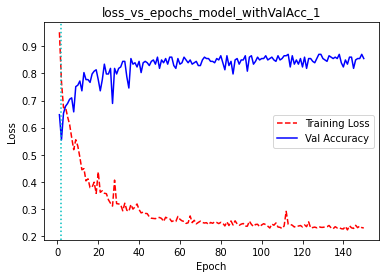

In [35]:
Id_variation = "1"
md_file_name = model_save_file_name + Id_variation
ht_file_name = history_save_file_name + Id_variation
image_file_name = imageLossEpochs_save_file_name + Id_variation

epochs = 150
learning_rate = 1
batch_size = 32
units_hiddenLayer = 256
# trainModel_andSave(learning_rate,batch_size,units_hiddenLayer, model_save_file_name,history_save_file_name)
trainModel_andSave(learning_rate,batch_size,units_hiddenLayer, md_file_name,ht_file_name)
# graph_loss_vs_epochs(history_save_file_name, save_image_filename, title):
graph_loss_vs_epochs(ht_file_name +".npy", image_file_name, image_file_name)

In [38]:
# Recrea exactamente el mismo modelo solo desde el archivo
model= keras.models.load_model(md_file_name)

# Evaluando el modelo
Despues de entrenar el modelo y ver su accuracy, evaluamosel modelo con el dataset para test

In [40]:
print('\nEvaluating:')
test_loss, test_accuracy = model.evaluate(test_dataset_batched)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')


Evaluating:
4/4 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8705

Test accuracy: 87.0%, test loss: 0.349377


In [41]:
datasetDirecction = "./test-ds.csv"
data_students = pd.read_csv(datasetDirecction)
data_students

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase
0,3G,No,Colegio,No,Público,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar
1,4G,No,Colegio,No,Privado,16-20,Smartphone,Wifi,Media,Femenino,01-Mar
2,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0
3,3G,Si,Universidad,No,Público,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar
4,3G,No,Escuela,No,Público,06-Oct,Smartphone,Compra Megas,Media,Femenino,0
...,...,...,...,...,...,...,...,...,...,...,...
236,4G,No,Escuela,Si,Privado,01-May,Smartphone,Wifi,Media,Femenino,01-Mar
237,4G,No,Escuela,Si,Privado,01-May,Smartphone,Compra Megas,Media,Femenino,01-Mar
238,4G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar
239,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar


## Haciendo una prediccion
Una vez se tenga un modelo entrenado y probado con un buen accuracy podemos empezar a hacer predicciones con otros datos, para esta practica se utilizara el test-ds.csv para predecir el nivel de adaptacion

# Preparacion de datos

In [42]:
datasetDirecction = "./test-ds.csv"
data_students_test = pd.read_csv(datasetDirecction)
data_students_test

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase
0,3G,No,Colegio,No,Público,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar
1,4G,No,Colegio,No,Privado,16-20,Smartphone,Wifi,Media,Femenino,01-Mar
2,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0
3,3G,Si,Universidad,No,Público,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar
4,3G,No,Escuela,No,Público,06-Oct,Smartphone,Compra Megas,Media,Femenino,0
...,...,...,...,...,...,...,...,...,...,...,...
236,4G,No,Escuela,Si,Privado,01-May,Smartphone,Wifi,Media,Femenino,01-Mar
237,4G,No,Escuela,Si,Privado,01-May,Smartphone,Compra Megas,Media,Femenino,01-Mar
238,4G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar
239,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar


In [43]:
data_students_test = pd.get_dummies(data_students_test, columns=None)
data_students_test

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
3,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0
237,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
238,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
239,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [44]:
dataset_test_x = data_students_test.iloc[0:].to_numpy()
predicted_names = []
for row in dataset_test_x:
    predicted_vector = model.predict(np.array([row]))
    predicted_index = np.argmax(predicted_vector)
    predicted_name = labels_map[predicted_index]
    predicted_names.append(predicted_name)

predicted_data = pd.DataFrame({'Nivel de Adaptación': np.array(predicted_names)})
predicted_data

,Nivel de Adaptación
0,Bajo
1,Bajo
2,Bajo
3,Moderado
4,Bajo
...,...
236,Moderado
237,Moderado
238,Moderado
239,Moderado


In [45]:
predicted_data.to_csv('predicted-ds_withValAcc.csv')

Dudas
- Para el nivel de educacion colegio y escuela son lo mismo
- las fechas en las edades

# Fuentes
- https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-keras/4-train
- https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-keras/2-data?source=learn
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Class para facilitar el manejo Funciones para el procesamiento de datos

class Predict_studentAdaptability():
    self.data_students = None
    
def process_data_OHE(datasetPath):
    data_students = pd.read_csv(datasetDirecction)